### 1. imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
from ISLP import load_data

### 2. 단순 선형 회귀 분석

`-` Boston data 불러오기

* **lstat** 변수만 사용
* X = [**1**, `lstat` 벡터] 형태
* y = medv 변수

In [10]:
from ISLP.models import (ModelSpec as MS, summarize , poly)
from pandas.io.formats.format import DataFrameFormatter
# Inside the pandas/io/formats/html.py file (you'll need to find this file in your pandas installation),
# locate the _get_columns_formatted_values function and modify it as follows:
def _get_columns_formatted_values(self) -> list[str]:
        # only reached with non-Multi Index
        # return self.columns._format_flat(include_name=False)  # Replace this line
  formatter = DataFrameFormatter(self.columns, include_name=False)  # With this line
  return formatter._format_col_name_split()

Boston = load_data("Boston")
print(Boston.columns)
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat': Boston['lstat']})
print(X[:4])
y = Boston['medv']
print(f'-데이터의 수 : {len(y)}')

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')
   intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94
-데이터의 수 : 506


`-` Boston data 단순 선형 회귀 분석

* medv ~ lstat
* $R^2$ 독립변수가 종속변수를 얼마나 잘 설명하는지 0~1사이
    * 독립변수가 늘어날수록 무조건 증가
* adj. $R^2$ 변수의 수를 고려해 보정 (단순 선형 회귀에서는 거의 같음)
* DF(Degrees of Freedom, 자유도) 1/504
* DF Residuals : 504 $\to$ 잔차 자유도(관측값 수 - 추정한 모수 수-보통 n-2)
* DF Model : 1 $\to$ 회귀 자유도(독립변수 수)
* Durbin-Watson(DW 통계량) : 오차들 사이에 자기상관
    * 2 근처 : 자기상관 없음(좋음)
    * 2보다 작음 : 양의 자기상관
    * 2보다 큼 : 음의 자기상관
* Skew : 왜도
    * 0 : 완전 대칭
    * (> 0) : 오른쪽 꼬리가 길다
    * (< 0 ) : 왼쪽 꼬리가 길다
* Kurtosis : 첨도
    * 3 : 정규분포
    * (> 3) : 뾰족하고 꼬리가 두꺼움
    * (< 3) : 평평하고 꼬리가 얇음
---

`-` 덜 중요?

* F-statistic : 전체 모델이 통계적으로 유의미한지
* Prob : F값에 따른 p-value
* intercept : 절편
    * coef : lstat = 0 일 때 medv가 34.55로 예측된다는 뜻
    * std err : 표준오차 
    * t : t-통계량 $\to$ 계수가 0인지 아닌지 검정
    * P>|t| : p-value $\to$ 작을수록 유의미한 변수
    * [0.025, 0.975] : 95% 신뢰구간
* lstat
    * coef : lstat이 1% 증가할 때 medv는 약 0.95감소
* Omnibus : 정규성 검정 $\to$ 클수록 정규성 위배 가능성 커짐
* Prob(Omnibus) : p-value 0.000 이므로 정규분포 아닐 가능성 큼
* Jarque-Bera : 또다른 정규성 검정 지표
* Log-Likelihood : 모델의 로그 가능도
* AIC / BIC : 모형 간 비교 지표(낮을 수록 좋음)
* Cond. No : 다중공선성 지표(높으면 위험)

In [7]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           5.08e-88
Time:                        09:10:46   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.0

`-` _X : 아무런 변수 생성 : p-value 0.05보다 작게 나올수도?

* T-test로 변수 선택하는데에는 한계 존재, 변수가 많을 때는 다른 방법

In [22]:
_X =np.random.normal(0,1, size=(len(y), len(y-1))) 
_X

array([[-1.2014418 , -0.36229144, -0.20156353, ...,  0.5128146 ,
        -1.69055217,  1.36297382],
       [ 1.97238504, -0.22323065,  0.51710176, ...,  0.81227357,
        -0.85792917,  0.27368867],
       [-0.74635151, -0.2920941 , -0.8552335 , ...,  1.22772083,
        -0.07547889, -0.59557387],
       ...,
       [ 0.20602294,  0.13454536,  0.72263167, ...,  0.03738331,
         0.49048762, -0.44020111],
       [-0.07030914, -0.04136855,  0.16204887, ...,  0.23999928,
         1.4415386 ,  0.69481763],
       [ 0.30221035, -0.50379848, -0.81854603, ...,  0.47187981,
        -0.95241703,  0.0196086 ]])

`-` MS 구문 이용해 입력 행렬 처리

In [11]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
print(X[:4])
model = sm.OLS(y, X)
results = model.fit()
print(results.params)

   intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94
intercept    34.553841
lstat        -0.950049
dtype: float64


`-` 새로운 입력변수 [**1** , lstat벡터] 생성, 예측

In [15]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
print(newX)
new_predictions = results.get_prediction(newX);
print(f'평균 : \n{new_predictions.predicted_mean}')
print(f'신뢰구간 : \n{new_predictions.conf_int(alpha=0.05)}')
print(f'예측구간 : \n{new_predictions.conf_int(obs=True, alpha=0.05)}')

   intercept  lstat
0        1.0      5
1        1.0     10
2        1.0     15
평균 : 
[29.80359411 25.05334734 20.30310057]
신뢰구간 : 
[[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]
예측구간 : 
[[17.56567478 42.04151344]
 [12.82762635 37.27906833]
 [ 8.0777421  32.52845905]]


`-` 평균직선에 대한 그래프 / 잔차에 대한 그래프

/tmp/ipykernel_147714/1347888005.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipykernel_147714/1347888005.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1], 'r--', linewidth=3)


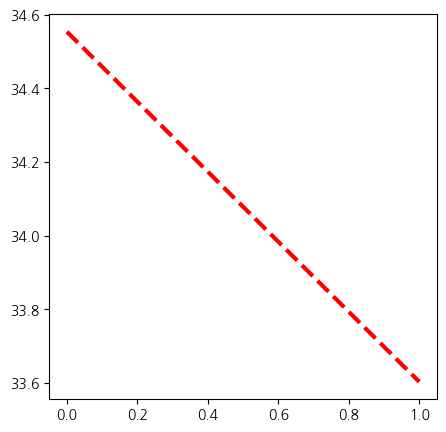

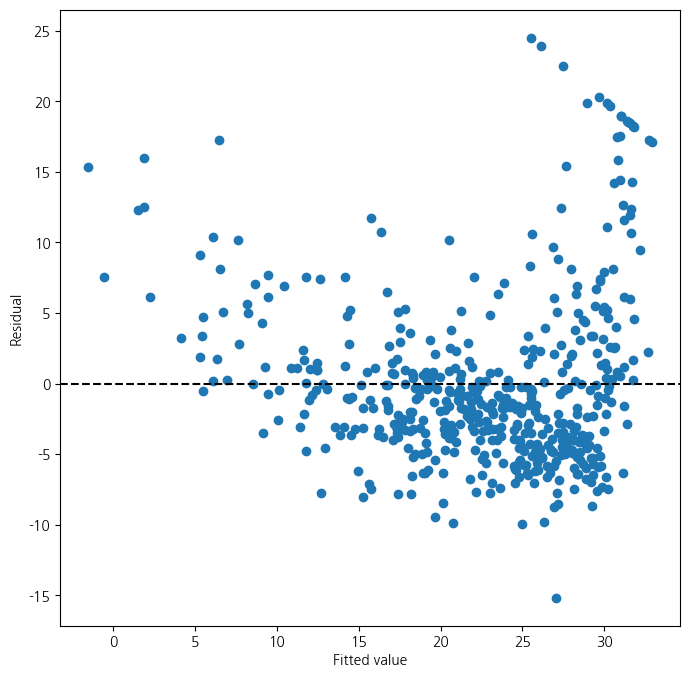

In [16]:
import matplotlib.pyplot as plt

def abline(ax, b, m):
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim)

def abline(ax, b, m, *args, **kwargs):
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim, *args, **kwargs)

ax = subplots(figsize=(5,5))[1]
abline(ax,
results.params[0],
results.params[1], 'r--', linewidth=3)

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

`-` 잔차 표준화 필요 : 0~1사이 왔다갔다..

`-` 현재 문제점 : 잔차들이 곡선의 형태를 띄고 있음 $\to$ 곡선을 표현할 수 있는 변수 사용

`-` 관측치에 대한 leverage(**각 관측치의 영향력**) 계산 및 그래프화

* 각 데이터마다 영향의 크기가 다름

374

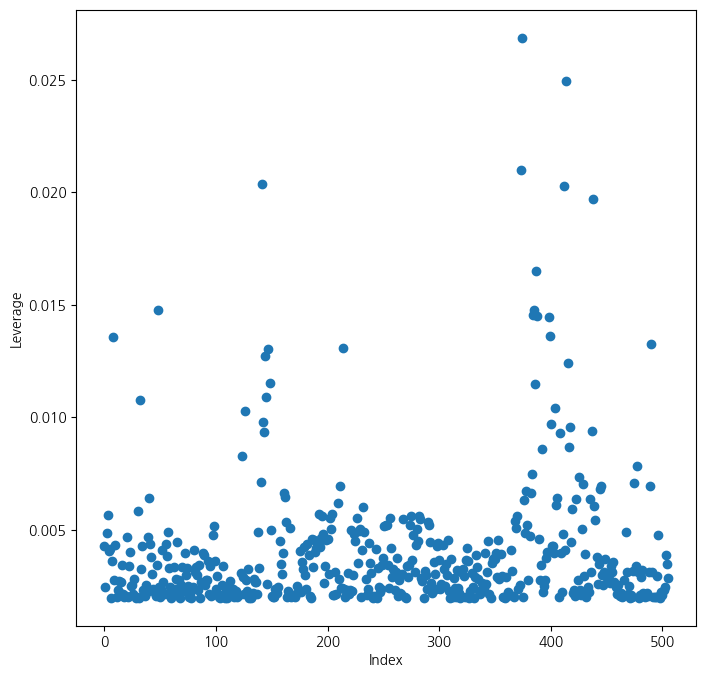

In [19]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

### 3. 다중 선형 회귀

`-` 입력 변수를 `lstat` + `age`로 변경

In [23]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(summarize(results1))

              coef  std err       t  P>|t|
intercept  33.2228    0.731  45.458  0.000
lstat      -1.0321    0.048 -21.416  0.000
age         0.0345    0.012   2.826  0.005


`-` 입력변수를 `mdev`를 제외한 모든 변수로 확장

In [24]:
terms = Boston.columns.drop('medv')
terms
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
print(summarize(results))

              coef  std err       t  P>|t|
intercept  41.6173    4.936   8.431  0.000
crim       -0.1214    0.033  -3.678  0.000
zn          0.0470    0.014   3.384  0.001
indus       0.0135    0.062   0.217  0.829
chas        2.8400    0.870   3.264  0.001
nox       -18.7580    3.851  -4.870  0.000
rm          3.6581    0.420   8.705  0.000
age         0.0036    0.013   0.271  0.787
dis        -1.4908    0.202  -7.394  0.000
rad         0.2894    0.067   4.325  0.000
tax        -0.0127    0.004  -3.337  0.001
ptratio    -0.9375    0.132  -7.091  0.000
lstat      -0.5520    0.051 -10.897  0.000


`-` p-value가 가장 높은  `indus`, `age` 변수 제외

In [25]:
minus_age = Boston.columns.drop(['medv','indus', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
print(summarize(model1.fit()))

              coef  std err       t  P>|t|
intercept  41.4517    4.903   8.454  0.000
crim       -0.1217    0.033  -3.696  0.000
zn          0.0462    0.014   3.378  0.001
chas        2.8719    0.863   3.329  0.001
nox       -18.2624    3.565  -5.122  0.000
rm          3.6730    0.409   8.978  0.000
dis        -1.5160    0.188  -8.078  0.000
rad         0.2839    0.064   4.440  0.000
tax        -0.0123    0.003  -3.608  0.000
ptratio    -0.9310    0.130  -7.138  0.000
lstat      -0.5465    0.047 -11.519  0.000


`-` 변수 제외하고 중간에서도 전체 요약을 출력해 전체적인 변화를 봐야함

In [29]:
result1 = model1.fit()
#print(result1.summary())

`-` 다중공선성을 확인하기 위한 VIF값

* 값이 크다는 것은 $R^2$가 크다는 것
* $\to$ 자신이 없어도 나머지 변수들의 영향을 많이 받아 설명을 잘한다는 의미

In [32]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},index=X.columns[1:])
print(vif)

              vif
crim     1.767486
zn       2.298459
indus    3.987181
chas     1.071168
nox      4.369093
rm       1.912532
age      3.088232
dis      3.954037
rad      7.445301
tax      9.002158
ptratio  1.797060
lstat    2.870777


`-` 교호작용을 포함한 선형회귀분석

* 교호작용이라는 두 변수 간의 시너지 존재하는 경우!
* 특정 변수가 다른 변수의 영향력에 영향을 준다는 의미
* 변수가 많으면 모든 교호작용 고려 힘듦
* EDA먼저 필요


`-` `lstat`과 `age`간의교호작용

* 결과 : `lstat`이 평균을 높여주는 효과가 `age`가 클수록 커짐

In [33]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
print(summarize(model2.fit()))

              coef  std err       t  P>|t|
intercept  36.0885    1.470  24.553  0.000
lstat      -1.3921    0.167  -8.313  0.000
age        -0.0007    0.020  -0.036  0.971
lstat:age   0.0042    0.002   2.244  0.025


`-` `lstat`에 대해 다항식 차원을 2까지 늘림

* lstat + lstat$^2$
* 만약 5차원이면 lstat + lstat$^2$ + ... + lstat$^5$
* 아래에서 2차식까지 통계적 유의성 확인됨

In [34]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
print(summarize(results3))

                              coef  std err       t  P>|t|
intercept                  17.7151    0.781  22.681    0.0
poly(lstat, degree=2)[0] -179.2279    6.733 -26.620    0.0
poly(lstat, degree=2)[1]   72.9908    5.482  13.315    0.0
age                         0.0703    0.011   6.471    0.0


`-` result1은 lstat에 대한 선형, result3은 lstat에 대한 2차 다항식

* 아래 검정은 다항식을 2차로 쓰는 것이 유의한지를 검정
* 0,1 둘 다 유의하다는 결과 $\to$ 그러면 2차식까지 쓰는 것이 맞음
* 큰 모형에서 확실한 효과가 있다는 것이 보여짐

In [35]:
print(anova_lm(results1, results3))

   df_resid           ssr  df_diff      ss_diff           F        Pr(>F)
0     503.0  19168.128609      0.0          NaN         NaN           NaN
1     502.0  14165.613251      1.0  5002.515357  177.278785  7.468491e-35


`-` results3의 결과에 대한 잔차의 산점도

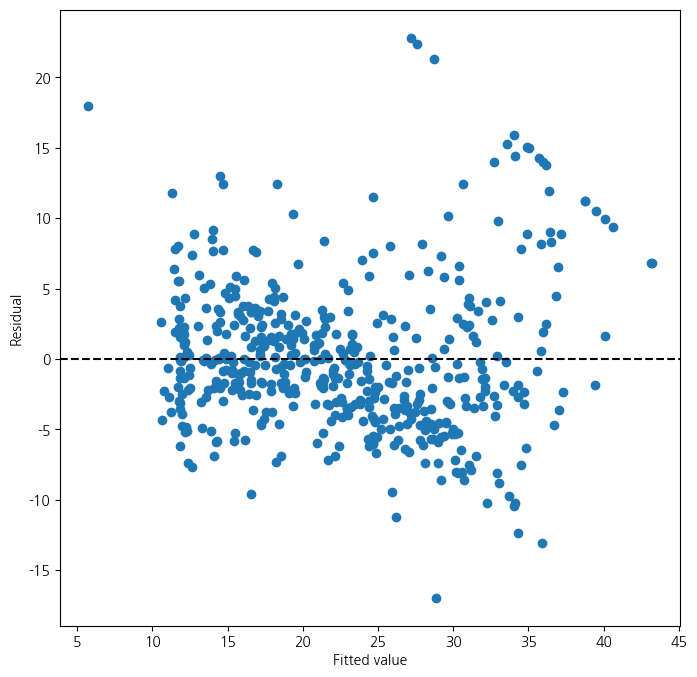

In [36]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

---

`-` Carseats data

* `Sales` 반응변수
* 나머지 전체 + `Income`*`Advertising`과 `Price`*`Age`의 교호작용 추가
* 둘 중에서 `Income`*`advertising`만 통계적으로 유의

In [39]:
Carseats = load_data('Carseats')
print(Carseats.columns)
print(Carseats.head())
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']

final = allvars + [('Income', 'Advertising'),('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
print(model.fit().aic)
print(summarize(model.fit()))

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
1157.337779308029
                      coef  std err       t  P>|t|
intercept           6.5756    1.009   6.519  0.000
CompPrice           0.0929    0.004  22.567  0.000
Income              0.0109    0.003   4.183  0.00

### 4. 가변수 사용법

In [40]:
from ISLP.models import contrast

Bike = load_data('Bikeshare')
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [41]:
X2 = MS(['mnth', 'hr', 'workingday','temp', 'weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M1_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M1_lm)
print(S2)

                                 coef  std err       t  P>|t|
intercept                    -68.6317    5.307 -12.932  0.000
mnth[Feb]                      6.8452    4.287   1.597  0.110
mnth[March]                   16.5514    4.301   3.848  0.000
mnth[April]                   41.4249    4.972   8.331  0.000
mnth[May]                     72.5571    5.641  12.862  0.000
mnth[June]                    67.8187    6.544  10.364  0.000
mnth[July]                    45.3245    7.081   6.401  0.000
mnth[Aug]                     53.2430    6.640   8.019  0.000
mnth[Sept]                    66.6783    5.925  11.254  0.000
mnth[Oct]                     75.8343    4.950  15.319  0.000
mnth[Nov]                     60.3100    4.610  13.083  0.000
mnth[Dec]                     46.4577    4.271  10.878  0.000
hr[1]                        -14.5793    5.699  -2.558  0.011
hr[2]                        -21.5791    5.733  -3.764  0.000
hr[3]                        -31.1408    5.778  -5.389  0.000
hr[4]   

`-` contrast : 범주형 변수에 대한 코딩방식 지정

* `sum`은 범주혀 변수의 모든 계수의 합이 0이 되도록 제약
* 그러면 마지막 범주는 계수 추정되지 않고 나머지 계수들의 합의 음수가 됨
* 결과가 0에 가까움 $\to$ 거의 차이가 없음, 예측력 자체는 인코딩 방식에 거의 영향을 받지 않음

In [44]:
hr_encode = contrast('hr', 'sum')     # 합에 대한 제약을 검
mnth_encode = contrast('mnth', 'sum') # 합에 대한 제약을 검
X2 = MS([mnth_encode, hr_encode, 'workingday','temp', 'weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
print(S2)
np.sum((M1_lm.fittedvalues - M2_lm.fittedvalues)**2)

                                 coef  std err       t  P>|t|
intercept                     73.5974    5.132  14.340  0.000
mnth[Jan]                    -46.0871    4.085 -11.281  0.000
mnth[Feb]                    -39.2419    3.539 -11.088  0.000
mnth[March]                  -29.5357    3.155  -9.361  0.000
mnth[April]                   -4.6622    2.741  -1.701  0.089
mnth[May]                     26.4700    2.851   9.285  0.000
mnth[June]                    21.7317    3.465   6.272  0.000
mnth[July]                    -0.7626    3.908  -0.195  0.845
mnth[Aug]                      7.1560    3.535   2.024  0.043
mnth[Sept]                    20.5912    3.046   6.761  0.000
mnth[Oct]                     29.7472    2.700  11.019  0.000
mnth[Nov]                     14.2229    2.860   4.972  0.000
hr[0]                        -96.1420    3.955 -24.307  0.000
hr[1]                       -110.7213    3.966 -27.916  0.000
hr[2]                       -117.7212    4.016 -29.310  0.000
hr[3]   

1.6273003592224878e-19

`-` 제약조건이 걸린 계수 확인

* 위의 계수들의 합에 음수를 취해 마지막 계수 생성

In [45]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
print(coef_month)
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index=['mnth[Dec]'])
])
print(coef_month)

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64
mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64


`-` 월에 대응되는 계수들을 선도표로 연결해서 시각화

* 겨울에는 잘 안타는 듯
* 여름에도 조금 떨어지는 경향을 보임

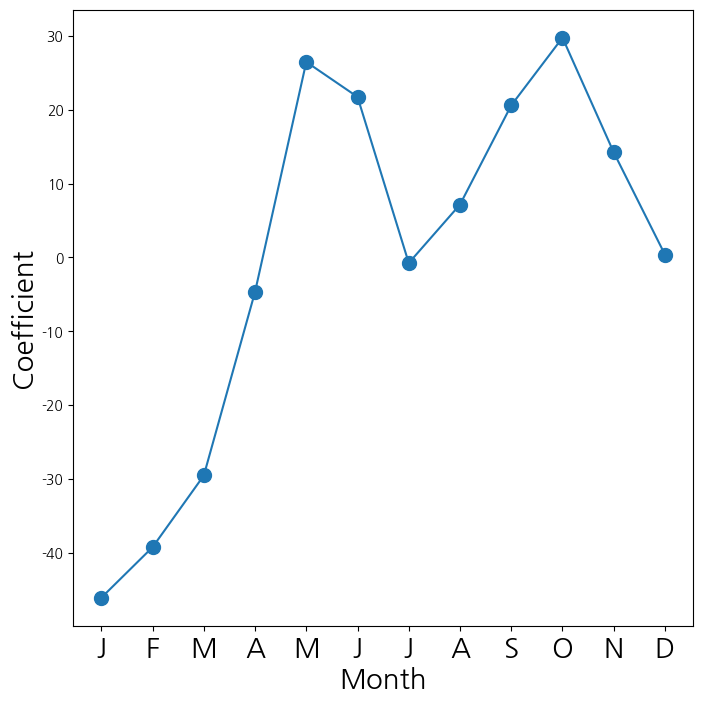

In [46]:
fig_month , ax_month = subplots(figsize=(8,8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month , coef_month , marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize
=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20);

`-` 시간에 대응되는 계수들을 선도표로 연겨해서 시각화

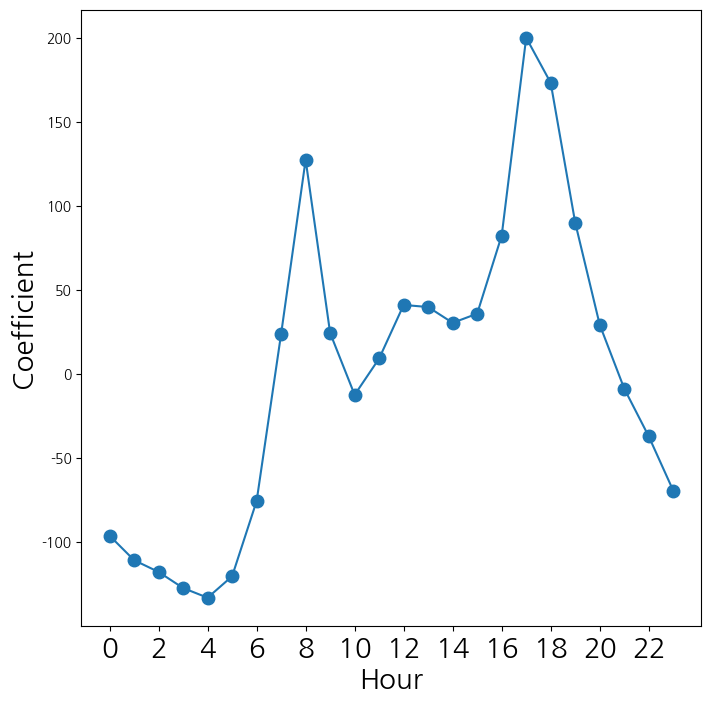

In [47]:
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex(['hr[{0}]'.format(h) for h in range(23)])
coef_hr = pd.concat([coef_hr, pd.Series([-coef_hr.sum()], index=['hr[23]'])
])
fig_hr , ax_hr = subplots(figsize=(8,8))
x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr , coef_hr , marker='o', ms=9)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize =20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);